1. **IMPORT NECESSARY LIBRARIES**

In [1]:
import pandas as pd
import requests
pd.set_option("display.max_columns", None)
pd.set_option("display.max_rows", None)
import numpy as np
import folium
import json 
from pandas.io.json import json_normalize 
import matplotlib.cm as cm
import matplotlib.colors as colors
from sklearn.cluster import KMeans
! pip install geopy
from geopy.geocoders import Nominatim 
! pip install geocoder
import geocoder 

In [2]:
conda install -c anaconda xlrd --yes

Solving environment: done


==> WARNING: A newer version of conda exists. <==
  current version: 4.8.3
  latest version: 4.8.4

Please update conda by running

    $ conda update -n base -c defaults conda



## Package Plan ##

  environment location: /home/jupyterlab/conda/envs/python

  added / updated specs:
    - xlrd


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    ca-certificates-2020.6.24  |                0         133 KB  anaconda
    certifi-2020.6.20          |           py36_0         160 KB  anaconda
    openssl-1.1.1g             |       h7b6447c_0         3.8 MB  anaconda
    ------------------------------------------------------------
                                           Total:         4.1 MB

The following packages will be SUPERSEDED by a higher-priority channel:

  ca-certificates                                 pkgs/main --> anaconda
  certifi                   

In [3]:
conda install bs4

Solving environment: done


==> WARNING: A newer version of conda exists. <==
  current version: 4.8.3
  latest version: 4.8.4

Please update conda by running

    $ conda update -n base -c defaults conda



## Package Plan ##

  environment location: /home/jupyterlab/conda/envs/python

  added / updated specs:
    - bs4


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    ca-certificates-2020.6.24  |                0         125 KB
    certifi-2020.6.20          |           py36_0         156 KB
    openssl-1.1.1g             |       h7b6447c_0         2.5 MB
    ------------------------------------------------------------
                                           Total:         2.8 MB

The following packages will be SUPERSEDED by a higher-priority channel:

  ca-certificates                                  anaconda --> pkgs/main
  certifi                                          anacond

2. **LOAD SOURCE WEBPAGE & ASSIGN VARIABLE SOURCE**

In [4]:
import requests
! pip install bs4
from bs4 import BeautifulSoup
data = requests.get("http://datausa.io/api/data?measure=Property Value by Bucket,Property Value by Bucket%20Moe&geo=16000US3420020,01000US&drilldowns=Value%20Bucket").text
soup = BeautifulSoup(data, 'html.parser')

3. **SCRAPE THE WEBPAGE**

In [5]:
table = soup.find('table', class_ = 'wikitable sortable')
PropertyValuesList = [] 


4. **PLACED THE SCRAPED DATA INTO A DATAFRAME**

In [6]:
Edgewater_PropertyValues = {'PropertyValuesList' : PropertyValuesList}
Edgewater_DF = pd.DataFrame.from_dict(Edgewater_PropertyValues, orient='index')
Edgewater_DF.head()

""
PropertyValuesList


In [7]:
Edgewater_DF = pd.DataFrame({"ProperyValue": PropertyValuesList})

Edgewater_DF.head()

,ProperyValue


5. **GET GEOGRAPHICAL COORDINATES**

In [8]:
import pandas as pd
Coordinates = pd.read_csv("coordinates.json")
Coordinates.head()

,"{""DD"":{""lat"":40.82989",lng:-73.97391},"DMS:{""lat"":""40º49'47.61\"" N""","lng:""73º58'26.08\"" W""}","geohash:""dr72k8vg6g""","UTM:""18T 586517.81862157 4520380.39565467""}"


6. **IMPORT A MAP OF EDGEWATER, NJ**

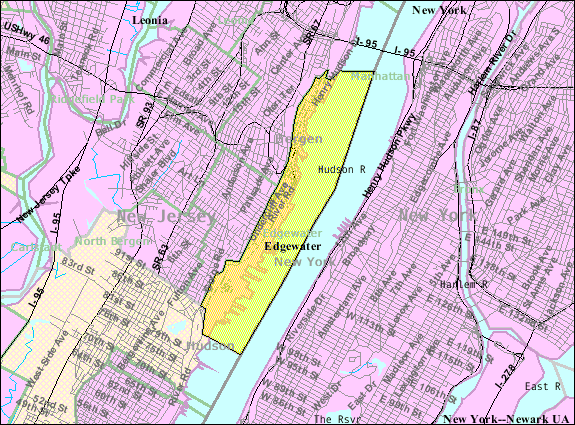

In [9]:
from PIL import Image
img = Image.open('edgewatermap.png')
img